# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    #pickle.dump(valid, validation_file, protocol=2)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import numpy as np
# combine training and validation data


X_combine, y_combine = np.concatenate((X_train, X_valid), axis=0), np.concatenate((y_train, y_valid), axis=0)
combined = {'features': X_combine, 'labels': y_combine}

combined_file = "./traffic-signs-data/combined.p"
with open(combined_file, mode='wb') as f:
    pickle.dump(combined, f, protocol=pickle.HIGHEST_PROTOCOL)
with open(combined_file, mode='rb') as f:
    test_combined = pickle.load(f)

assert np.all(test_combined['features'] == X_combine)
assert np.all(test_combined['labels'] == y_combine)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# get number of combine examples 
n_combine = len(y_combine)

# get number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print "Number of training examples =", n_train
print "Number of validation examples =", n_validation
print "Checking training + validation size = ", n_train+n_validation
print "Number of testing examples =", n_test
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Checking training + validation size =  39209
Number of testing examples = 12630
('Image data shape =', (32, 32, 3))
('Number of classes =', 43)


In [9]:
# load the signname csv files
import numpy as np
import pandas as pd

# read in sign data
signs_name = pd.read_csv("signnames.csv")
# convert sign data to np array
signs_name = np.array(signs_name)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [10]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

label_counts = np.zeros(shape=(n_classes+1),dtype=np.int)

image_folder = "output_images/"

def classes_count_visualize(labels):
    # bar chart of number of elements in each class
    # visualize the distribution of the dataset
    #total_y = np.concatenate(labels,axis=0)
    
    x_range = np.linspace(0, n_classes, n_classes+1, dtype=np.int)
    
    for x in x_range:
        label_counts[x] = np.sum(labels==x)
    
    print np.sort(label_counts)[1:]
    top_five_classes_index = label_counts.argsort()[-5:][::-1]
    top_five_signs_name = signs_name[top_five_classes_index,1]
    for i in range(5):
        index = top_five_classes_index[i]
        print "{},{}: {}".format(index, top_five_signs_name[i], label_counts[index])
    figsize=(8, 6)
    plt.bar(x_range, label_counts)
    plt.show()
import random
def visualize_images(images,labels, list_size=3):
    fig = plt.figure(figsize=(30,3))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    samples = random.sample(range(len(images)),10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i+1)
        axis.imshow(images[samples[i]])
    plt.show()
def visualize_image(images):
    samples = random.sample(range(len(images)),1)
    print("Size: {}".format(images[samples[0]].shape))
    plt.imshow(images[samples[0]])
    plt.show()

[ 270  270  270  300  300  300  330  360  360  390  420  450  450  510  510
  540  570  570  600  660  690  780  840  899 1050 1050 1470 1590 1590 1740
 1860 1860 1890 1950 1980 2490 2640 2670 2760 2790 2880 2940 3000]
2,Speed limit (50km/h): 3000
1,Speed limit (30km/h): 2940
13,Yield: 2880
12,Priority road: 2790
38,Keep right: 2760


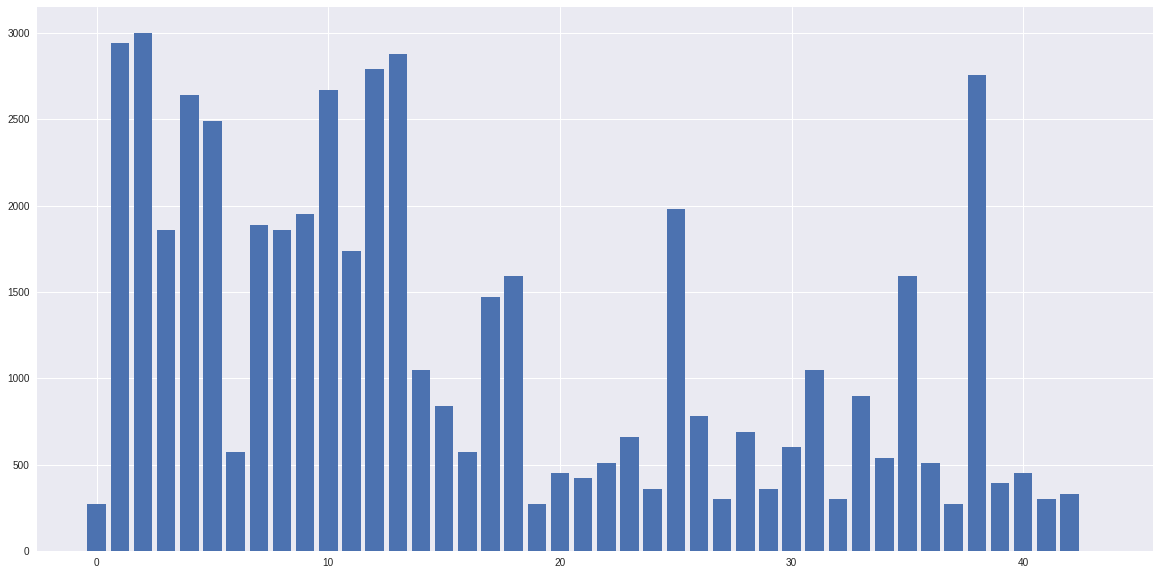

In [11]:
classes_count_visualize(np.concatenate((y_combine, y_test)))

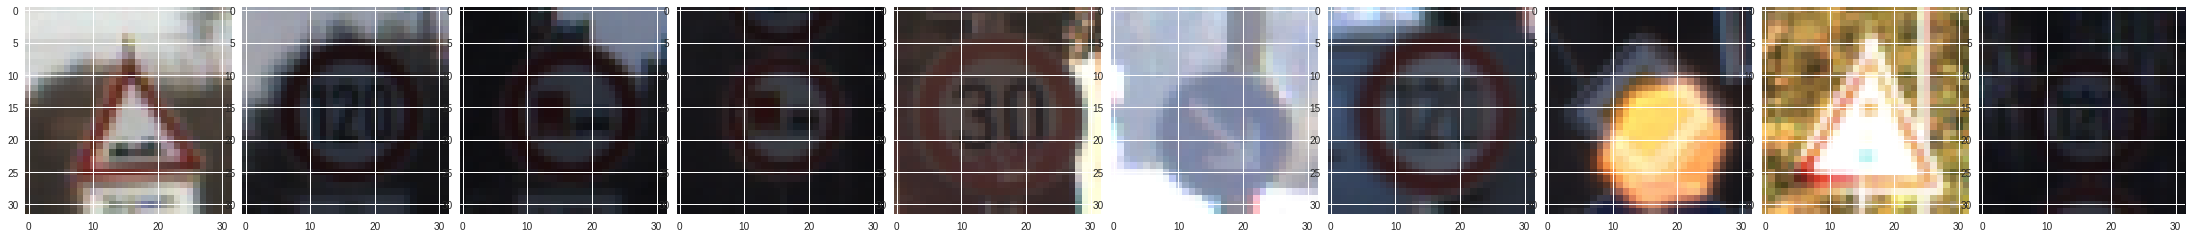

In [12]:
visualize_images(X_combine, y_combine)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
# Normalize the data
def normalize(data):
    a = 0
    b = 1.0
    return a + data * (b-a) / 255.

from skimage import color

def standarize(data):
    data = (data - np.mean(data)) / np.std(data)
    return data 

def rgb2gray(rgb):
    img = np.dot(rgb, [0.299, 0.587, 0.114])
    img = img.reshape((len(img), 32, 32, 1))
    return img

def grayscale(data):
    return np.sum(data/3, axis=3, keepdims=True)

def preprocess(data):
    X = rgb2gray(data) 
    X = normalize(X)
    X = standarize(X)
    return X

X_train_N = preprocess(X_combine)
X_test_N = preprocess(X_test)


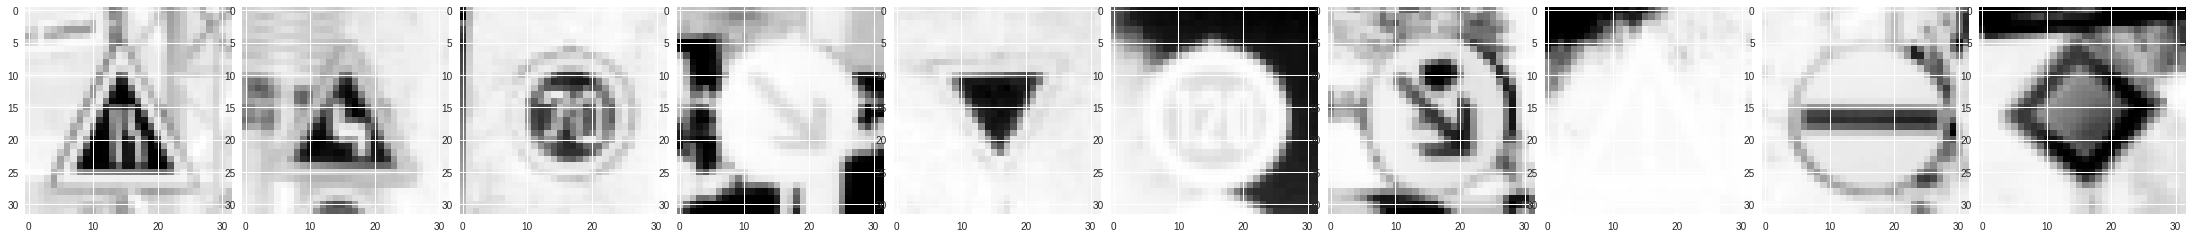

In [14]:
visualize_images(X_train_N.reshape(len(X_train_N), 32, 32), y_combine)

In [16]:
from sklearn.utils import shuffle

### Model Architecture

In [86]:
# import tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split

In [178]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 24), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(24))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print conv1.shape
    conv1 = tf.nn.relu(conv1)

    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print conv1.shape
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print conv2.shape
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print conv2.shape
    conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)
    

    
    fc0   = flatten(conv2)
    print fc0.shape
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 480), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(480))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print fc1.shape
    
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(480, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    print fc2.shape
    
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob=keep_prob)
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [179]:
# set placeholders 
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x_input")
y = tf.placeholder(tf.int32, (None ), name="y_label")
one_hot_y = tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32, (None))


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [180]:
EPOCH=100
BATCH_SIZE=128


In [181]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

learning_rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_function = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss_function)



(?, 28, 28, 24)
(?, 14, 14, 24)
(?, 10, 10, 48)
(?, 5, 5, 48)
(?, 1200)
(?, 480)
(?, 84)


In [160]:
prediction = tf.argmax(logits,1)
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [161]:
with tf.Session() as sess:
    # initial
    sess.run(tf.global_variables_initializer())
    
    # split the data into training and vlidation
    
    print "Training..."
    np.random.seed(99)
    Xtr, X_valid_N, ytr , y_valid = train_test_split(X_train_N, y_combine, test_size=0.2, random_state=52)
    for i in range(EPOCH):
        
        num_examples=len(Xtr)
        Xtr, ytr = shuffle(Xtr, ytr, random_state=52)

        for offset in range(0, num_examples, BATCH_SIZE):
            x_batch, y_batch = Xtr[offset:offset+BATCH_SIZE], ytr[offset:offset+BATCH_SIZE]
            training, training_accuracy = sess.run([training_op, accuracy_operation], feed_dict={x:x_batch, y:y_batch, keep_prob:0.5})
        
        validation_accuracy = evaluate(X_valid_N, y_valid)
        print("EPOCH {}\nValidation Accuracy = {:.3f}\nTraining Accuracy = {:.3f}\n ".format(i+1,validation_accuracy, training_accuracy))
 
    saver.save(sess,'./lenet')
    print("Model saved")
    
    

Training...
EPOCH 1
Validation Accuracy = 0.637
Training Accuracy = 0.857
 
EPOCH 2
Validation Accuracy = 0.845
Training Accuracy = 0.714
 
EPOCH 3
Validation Accuracy = 0.907
Training Accuracy = 0.571
 
EPOCH 4
Validation Accuracy = 0.942
Training Accuracy = 1.000
 
EPOCH 5
Validation Accuracy = 0.958
Training Accuracy = 0.857
 
EPOCH 6
Validation Accuracy = 0.971
Training Accuracy = 0.857
 
EPOCH 7
Validation Accuracy = 0.978
Training Accuracy = 0.857
 
EPOCH 8
Validation Accuracy = 0.975
Training Accuracy = 0.857
 
EPOCH 9
Validation Accuracy = 0.982
Training Accuracy = 0.857
 
EPOCH 10
Validation Accuracy = 0.986
Training Accuracy = 1.000
 
EPOCH 11
Validation Accuracy = 0.986
Training Accuracy = 0.714
 
EPOCH 12
Validation Accuracy = 0.986
Training Accuracy = 0.857
 
EPOCH 13
Validation Accuracy = 0.989
Training Accuracy = 1.000
 
EPOCH 14
Validation Accuracy = 0.990
Training Accuracy = 1.000
 
EPOCH 15
Validation Accuracy = 0.989
Training Accuracy = 1.000
 
EPOCH 16
Validation Ac

In [162]:
# testing model
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_N, y_test)
    print "Test accuracy: {:.3f}".format(test_accuracy)

Test accuracy: 0.964


[ 3  3  4  6  6  7  8  8  8  8 11 11 11 11 11 12 12 13 14 14 15 17 17 18 19
 21 23 31 33 34 35 36 37 37 39 42 45 46 49 51 51 56 67]
2,Speed limit (50km/h): 67
1,Speed limit (30km/h): 56
38,Keep right: 51
5,Speed limit (80km/h): 51
12,Priority road: 49


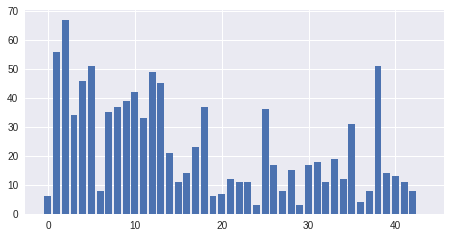

[  3   9  14  17  18  18  22  25  29  29  31  32  38  38  38  41  41  42
  48  50  51  59  59  60  60  63  66  66  73  77  78  90  90  96  96 108
 115 120 120 121 126 126 150]
5,Speed limit (80km/h): 150
2,Speed limit (50km/h): 126
1,Speed limit (30km/h): 126
35,Ahead only: 121
38,Keep right: 120


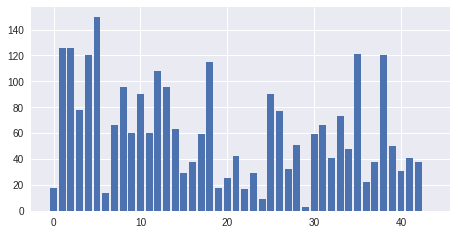

In [27]:
classes_count_visualize(feed_labels)
classes_count_visualize(new_labels)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

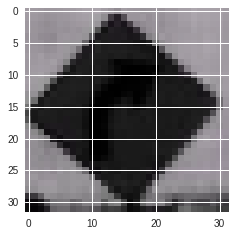

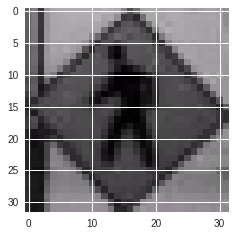

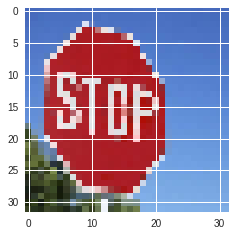

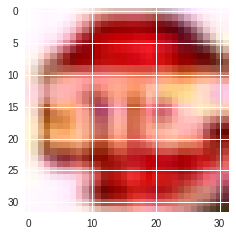

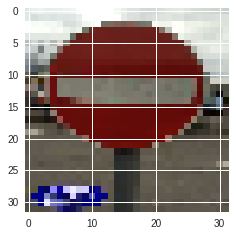

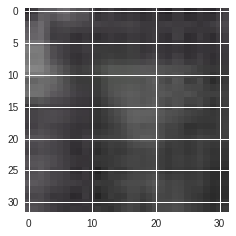

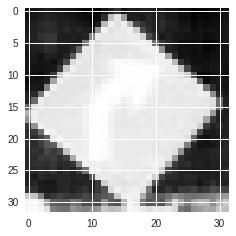

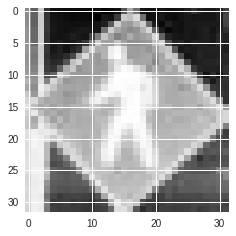

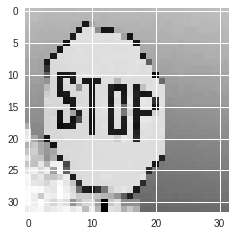

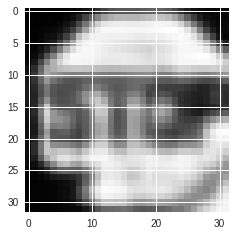

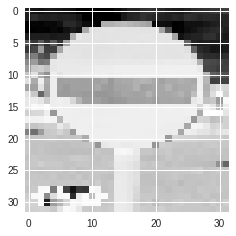

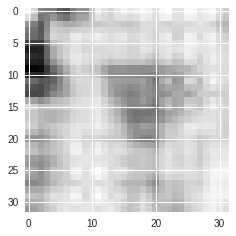

In [121]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
from PIL import Image
import glob
path = 'test_images/*'
image_list = []
files_path = glob.glob(path)
for filename in files_path:
    im = Image.open(filename)
    im = im.resize((32,32))
    im = np.array(im)
    image_list.append(im)
    
for i in range(len(files_path)):
    plt.imshow(image_list[i])
    plt.show()

normalized_images = preprocess(image_list)
for i in range(len(files_path)):
    plt.imshow(normalized_images[i].reshape(32,32))
    plt.show()

[14 27 14 14 13 13]


[32 'End of all speed and passing limits']


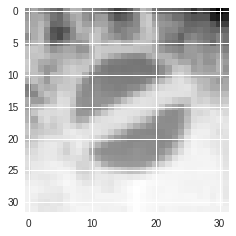

In [120]:
def show_img_by_class(index):
    ind = np.where(y_combine==index)
    data = X_train_N[ind][0]
    print signs_name[index]
    plt.imshow(data.reshape(32,32))
    plt.show()
ii = random.randint(0,42)
show_img_by_class(ii)


### Predict the Sign Type for Each Image

In [163]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
   
    pred, logts = sess.run([prediction, logits], feed_dict={x:normalized_images, keep_prob:1.0})
    print signs_name[pred]
    print files_path

[[14 'Stop']
 [14 'Stop']
 [14 'Stop']
 [14 'Stop']
 [9 'No passing']
 [13 'Yield']]
['test_images/curveRight4.png', 'test_images/pedestrianCrossing101.png', 'test_images/cleanstop7.jpg', 'test_images/stop1000.png', 'test_images/no_entry.jpg', 'test_images/yield11.png']


### Analyze Performance

In [167]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
y_pred = [20, 27, 14, 14, 9, 13]
print pred
print y_pred
print np.sum((pred==y_pred))/6.

[14 14 14 14  9 13]
[20, 27, 14, 14, 9, 13]
0.666666666667


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [169]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    logit = tf.placeholder(tf.float32, (None, n_classes))
    softmax = tf.nn.softmax(logit)
    top_k_vals, top_k_idx = tf.nn.top_k(softmax, k=5)
    top_vals, top_idx = sess.run([top_k_vals, top_k_idx], feed_dict={logit: logts})
    for val in top_vals:
        print val[:3]

[ 0.93458802  0.03975401  0.00769999]
[ 0.45186928  0.27783427  0.22326384]
[  5.62481284e-01   4.37100828e-01   2.24639138e-04]
[ 0.98910463  0.00294943  0.00219572]
[ 0.67233998  0.24612378  0.05065338]
[  9.99995112e-01   1.42229226e-06   1.33616334e-06]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [172]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [173]:
outputFeatureMap(normalized_images, logits)

RuntimeError: Attempted to use a closed Session.